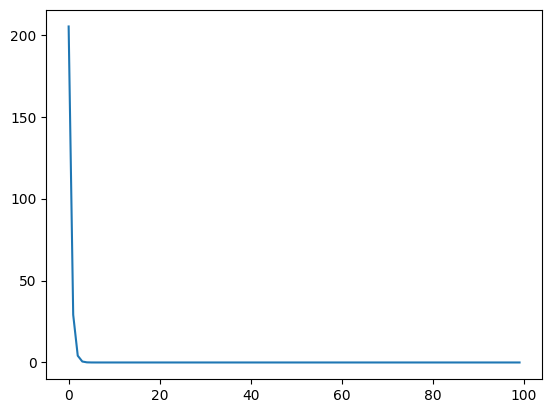

In [30]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
b = torch.rand([1],requires_grad = True)
w = torch.rand([1],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y_p-y[j])**2
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

    w.grad = None
    b.grad = None

plt.plot(loss_list)
plt.show()

After 0 epochs, w = tensor([1.1740], requires_grad=True),b = tensor([1.0520], requires_grad=True),loss = tensor([757.], grad_fn=<DivBackward0>)
After 10 epochs, w = tensor([2.7185], requires_grad=True),b = tensor([1.5128], requires_grad=True),loss = tensor([487.3802], grad_fn=<DivBackward0>)
After 20 epochs, w = tensor([3.9577], requires_grad=True),b = tensor([1.8812], requires_grad=True),loss = tensor([313.9355], grad_fn=<DivBackward0>)
After 30 epochs, w = tensor([4.9519], requires_grad=True),b = tensor([2.1754], requires_grad=True),loss = tensor([202.3593], grad_fn=<DivBackward0>)
After 40 epochs, w = tensor([5.7497], requires_grad=True),b = tensor([2.4102], requires_grad=True),loss = tensor([130.5821], grad_fn=<DivBackward0>)
After 50 epochs, w = tensor([6.3899], requires_grad=True),b = tensor([2.5973], requires_grad=True),loss = tensor([84.4073], grad_fn=<DivBackward0>)
After 60 epochs, w = tensor([6.9038], requires_grad=True),b = tensor([2.7461], requires_grad=True),loss = tensor

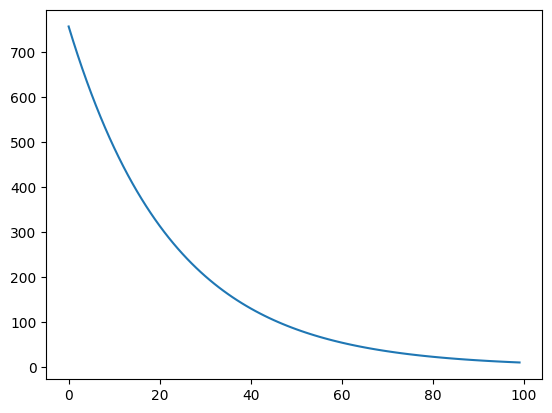

In [32]:
import numpy as np
from torch.autograd import grad

x = torch.tensor([2,4])
y = torch.tensor([20,40])
b = torch.tensor([1.0],requires_grad = True)
w = torch.tensor([1.0],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y_p-y[j])**2
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    
    w.grad = None
    b.grad = None
    if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

def analytical(x,y,w,b):  
    loss = 0.0
    loss_list = []
    for epochs in range(100):
        for j in range(len(x)):
            y_p = w*x[j] + b
            loss += (y[j] - y_p)
        loss = loss/len(x)
        loss_list.append(loss.item())
        wgrad,bgrad = 0,0
        for i in range(len(x)):
            wgrad += (y_p - y[j])*(x[i])
            bgrad += (y_p - y[j])
        w -= 0.001*wgrad*2/len(x)
        b -= 0.001*bgrad*2/len(x)
        
        if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

print("Analytical Solution")
analytical(x,y,1,1)

plt.plot(loss_list)

After 0 epochs, The parameters are w=tensor([0.6165], requires_grad=True),b=tensor([0.7257], requires_grad=True), and loss =335.97802734375
After 10 epochs, The parameters are w=tensor([0.8785], requires_grad=True),b=tensor([0.7480], requires_grad=True), and loss =329.0518493652344
After 20 epochs, The parameters are w=tensor([1.1373], requires_grad=True),b=tensor([0.7703], requires_grad=True), and loss =322.2918395996094
After 30 epochs, The parameters are w=tensor([1.3920], requires_grad=True),b=tensor([0.7925], requires_grad=True), and loss =315.7353515625
After 40 epochs, The parameters are w=tensor([1.6417], requires_grad=True),b=tensor([0.8145], requires_grad=True), and loss =309.4303283691406
After 50 epochs, The parameters are w=tensor([1.8851], requires_grad=True),b=tensor([0.8363], requires_grad=True), and loss =303.43524169921875
After 60 epochs, The parameters are w=tensor([2.1205], requires_grad=True),b=tensor([0.8577], requires_grad=True), and loss =297.81475830078125
Aft

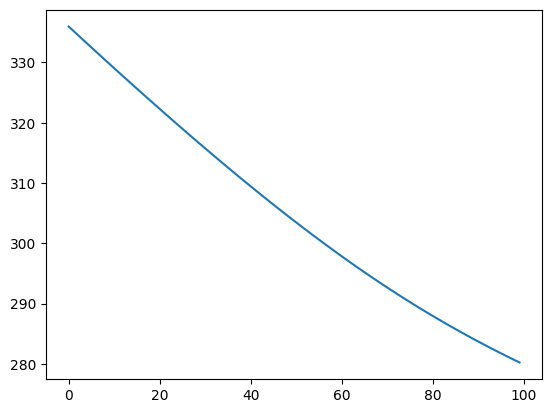

In [16]:
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x)
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()
    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

plt.plot(loss_list)


[tensor([ 7., 20.,  5., 16.]), tensor([120., 240.,  40., 210.])]
[tensor([12.]), tensor([180.])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([13.6144], requires_grad=True),b=Parameter containing:
tensor([1.3915], requires_grad=True), and loss =579.092041015625
After 10 epochs, The parameters are w=Parameter containing:
tensor([13.5718], requires_grad=True),b=Parameter containing:
tensor([1.8616], requires_grad=True), and loss =2184.814208984375
After 20 epochs, The parameters are w=Parameter containing:
tensor([13.9498], requires_grad=True),b=Parameter containing:
tensor([1.8797], requires_grad=True), and loss =1710.576904296875
After 30 epochs, The parameters are w=Parameter containing:
tensor([14.4935], requires_grad=True),b=Parameter containing:
tensor([2.0706], requires_grad=True), and loss =1900.7691650390625
After 40 epochs, The parameters are w=Parameter containing:
tensor([12.0441], requires_grad=True),b=Parameter containing:
tensor([2.2297], requires_grad

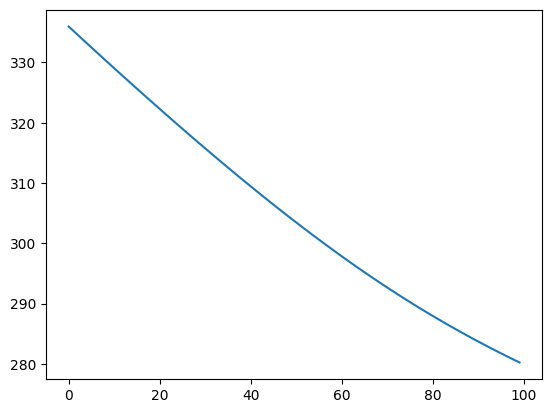

In [17]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)

for data in iter(data_loader):
    print(data)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)
plt.plot(loss_list)

In [18]:


import torch
import numpy as np
from torch.autograd import Variable

x = Variable(torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]))
y = Variable(torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23, 23)
        
    def forward(self,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10==0:
        print("After {} epochs, loss ={}".format(epochs,loss.item()))



After 0 epochs, loss =330.9881896972656
After 10 epochs, loss =1.2175244137324626e-06
After 20 epochs, loss =2.372594850620635e-13
After 30 epochs, loss =1.5817299455888473e-13
After 40 epochs, loss =1.5817299455888473e-13
After 50 epochs, loss =1.5817299455888473e-13
After 60 epochs, loss =1.5817299455888473e-13
After 70 epochs, loss =1.5817299455888473e-13
After 80 epochs, loss =1.5817299455888473e-13
After 90 epochs, loss =1.5817299455888473e-13


In [19]:
e

import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X1,X2,Y):
        self.X1 = X1
        self.X2 = X2
        self.Y = Y
    def __len__(self):
        return len(self.X1)
    def __getitem__(self,idx):
        return self.X1[idx],self.X2[idx],self.Y[idx]

x1 = torch.tensor([3,4,5,6,2])
x2 = torch.tensor([8,5,7,3,1])
y = torch.tensor([-3.5,3.5,2.5,11.5,5.7])
dataset = MyDataset(x1,x2,y)
data_loader = DataLoader(dataset,batch_size=2,shuffle=True)

for data in iter(data_loader):
    print(data)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.w2 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x1,x2):
        return self.w1*x1 + self.w2*x2 + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        x1,x2,labels = data
        optimizer.zero_grad()
        outputs = model(x1,x2)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w1,model.w2,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)



[tensor([4, 6]), tensor([5, 3]), tensor([ 3.5000, 11.5000])]
[tensor([2, 3]), tensor([1, 8]), tensor([ 5.7000, -3.5000])]
[tensor([5]), tensor([7]), tensor([2.5000])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([0.5048], requires_grad=True),b=Parameter containing:
tensor([0.1580], requires_grad=True), and loss =Parameter containing:
tensor([0.9127], requires_grad=True)
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.8889], requires_grad=True),b=Parameter containing:
tensor([-0.2032], requires_grad=True), and loss =Parameter containing:
tensor([0.9613], requires_grad=True)
After 20 epochs, The parameters are w=Parameter containing:
tensor([1.1661], requires_grad=True),b=Parameter containing:
tensor([-0.5343], requires_grad=True), and loss =Parameter containing:
tensor([0.9943], requires_grad=True)
After 30 epochs, The parameters are w=Parameter containing:
tensor([1.4340], requires_grad=True),b=Parameter containing:
tensor([-0.6973], requires_

In [20]:
eimport torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([1,5,10,10,25,50,70,75,100])
y = torch.tensor([0,0,0,0,0,1,1,1,1])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=1,shuffle=False)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.BCELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        sigmoid = torch.nn.Sigmoid()
        outputs = sigmoid(outputs)
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

After 0 epochs, The parameters are w=Parameter containing:
tensor([0.3564], requires_grad=True),b=Parameter containing:
tensor([0.9581], requires_grad=True), and loss =0.0
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.0297], requires_grad=True),b=Parameter containing:
tensor([0.9177], requires_grad=True), and loss =0.05222492292523384
After 20 epochs, The parameters are w=Parameter containing:
tensor([0.0301], requires_grad=True),b=Parameter containing:
tensor([0.8869], requires_grad=True), and loss =0.05141797661781311
After 30 epochs, The parameters are w=Parameter containing:
tensor([0.0306], requires_grad=True),b=Parameter containing:
tensor([0.8563], requires_grad=True), and loss =0.050616491585969925
After 40 epochs, The parameters are w=Parameter containing:
tensor([0.0310], requires_grad=True),b=Parameter containing:
tensor([0.8259], requires_grad=True), and loss =0.04982706159353256
After 50 epochs, The parameters are w=Parameter containing:
tensor([0.0